In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns  # 用于绘制热力图

# 1. 数据读取（使用之前处理好的数据）
data_path = r"C:\Users\rog\Desktop\Study\统模\Global-Inflation-Spillovers\new_data\final_cpi_data_filtered.csv"
df = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date").dropna()

# 2. 计算相关系数矩阵
corr_matrix = df.corr()

# 3. 构建网络图
def build_network(corr_matrix):
    """构建加权网络图"""
    G = nx.Graph()
    
    # 添加节点
    countries = corr_matrix.columns.tolist()
    G.add_nodes_from(countries)
    
    # 添加边（包括所有国家之间的相关性）
    for i in range(len(countries)):
        for j in range(i+1, len(countries)):
            weight = corr_matrix.iloc[i, j]
            G.add_edge(countries[i], 
                      countries[j], 
                      weight=weight,
                      color=weight)  # 存储颜色信息
                
    return G

# 4. 网络可视化
def plot_network(G, figsize=(16, 12), node_size=1200, font_size=10):
    """绘制加权网络图"""
    plt.figure(figsize=figsize)
    
    # 计算布局
    pos = nx.spring_layout(G, k=0.3, weight='weight', iterations=50)
    
    # 颜色映射（红色负相关，蓝色正相关）
    edges = G.edges(data=True)
    edge_colors = [data['color'] for _, _, data in edges]
    cmap = plt.cm.coolwarm
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    
    # 绘制边
    nx.draw_networkx_edges(
        G, pos,
        edge_color=edge_colors,
        edge_cmap=cmap,
        edge_vmin=-1,
        edge_vmax=1,
        width=np.array([abs(data['weight']) for _, _, data in edges])*3,
        alpha=0.6
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G, pos,
        node_size=node_size,
        node_color='lightgray',
        edgecolors='black',
        linewidths=0.5
    )
    
    # 节点标签
    nx.draw_networkx_labels(
        G, pos,
        font_size=font_size,
        font_family='Arial',
        font_weight='bold'
    )
    
    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink=0.8)
    cbar.set_label('Correlation Coefficient', fontsize=12)
    
    # 图例说明
    plt.title(f"Global Inflation Spillover Network", fontsize=14, pad=20)
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 5. 绘制热力图
def plot_heatmap(corr_matrix):
    """绘制相关性热力图"""
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title("Correlation Matrix Heatmap", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# 6. 执行可视化流程
network = build_network(corr_matrix)
plot_network(network)

# 绘制相关性热力图
plot_heatmap(corr_matrix)

# 7. 网络指标分析
print("\n网络基本指标:")
print(f"节点数量: {network.number_of_nodes()}")
print(f"边数量: {network.number_of_edges()}")
print(f"网络密度: {nx.density(network):.4f}")
print(f"平均聚类系数: {nx.average_clustering(network):.4f}")

# 8. 中心性分析
degree_centrality = nx.degree_centrality(network)
eigen_centrality = nx.eigenvector_centrality(network, weight='weight')

# 按特征向量中心性排序
sorted_nodes = sorted(eigen_centrality.items(), 
                     key=lambda x: x[1], 
                     reverse=True)[:5]

print("\nTop 5关键节点（特征向量中心性）:")
for node, score in sorted_nodes:
    print(f"{node}: {score:.3f}")


Epoch 1/500 | Loss: 2.0305
Epoch 2/500 | Loss: 1.9737
Epoch 3/500 | Loss: 1.9500
Epoch 4/500 | Loss: 1.9370
Epoch 5/500 | Loss: 1.9265
Epoch 6/500 | Loss: 1.9173
Epoch 7/500 | Loss: 1.9095
Epoch 8/500 | Loss: 1.9023
Epoch 9/500 | Loss: 1.8960
Epoch 10/500 | Loss: 1.8900
Epoch 11/500 | Loss: 1.8845
Epoch 12/500 | Loss: 1.8792
Epoch 13/500 | Loss: 1.8740
Epoch 14/500 | Loss: 1.8690
Epoch 15/500 | Loss: 1.8640
Epoch 16/500 | Loss: 1.8592
Epoch 17/500 | Loss: 1.8547
Epoch 18/500 | Loss: 1.8502
Epoch 19/500 | Loss: 1.8460
Epoch 20/500 | Loss: 1.8416
Epoch 21/500 | Loss: 1.8372
Epoch 22/500 | Loss: 1.8334
Epoch 23/500 | Loss: 1.8292
Epoch 24/500 | Loss: 1.8249
Epoch 25/500 | Loss: 1.8206
Epoch 26/500 | Loss: 1.8165
Epoch 27/500 | Loss: 1.8125
Epoch 28/500 | Loss: 1.8088
Epoch 29/500 | Loss: 1.8049
Epoch 30/500 | Loss: 1.8009
Epoch 31/500 | Loss: 1.7973
Epoch 32/500 | Loss: 1.7934
Epoch 33/500 | Loss: 1.7900
Epoch 34/500 | Loss: 1.7860
Epoch 35/500 | Loss: 1.7824
Epoch 36/500 | Loss: 1.7787
E

C:\Users\rog\AppData\Local\Temp\ipykernel_60768\2474187426.py:220: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
c:\Users\rog\.conda\envs\GAN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


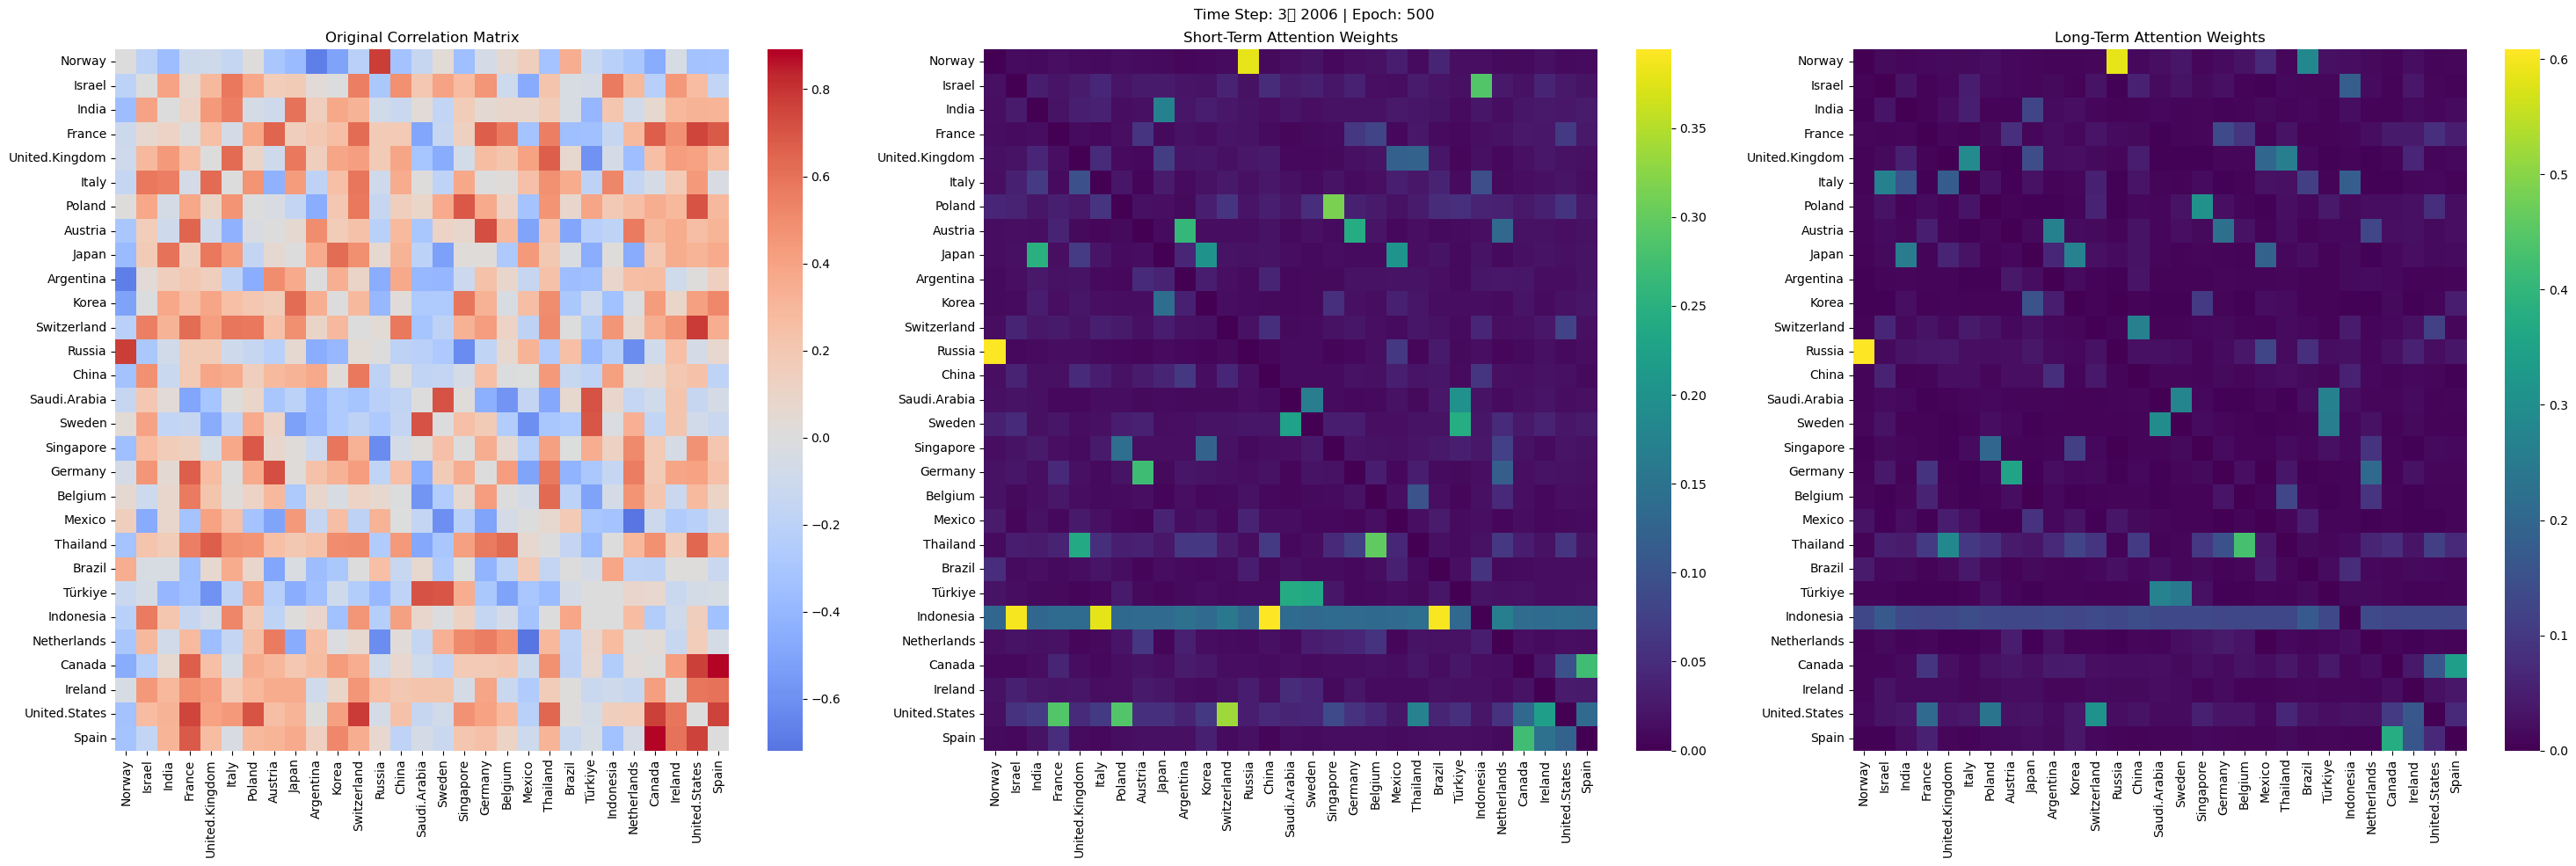

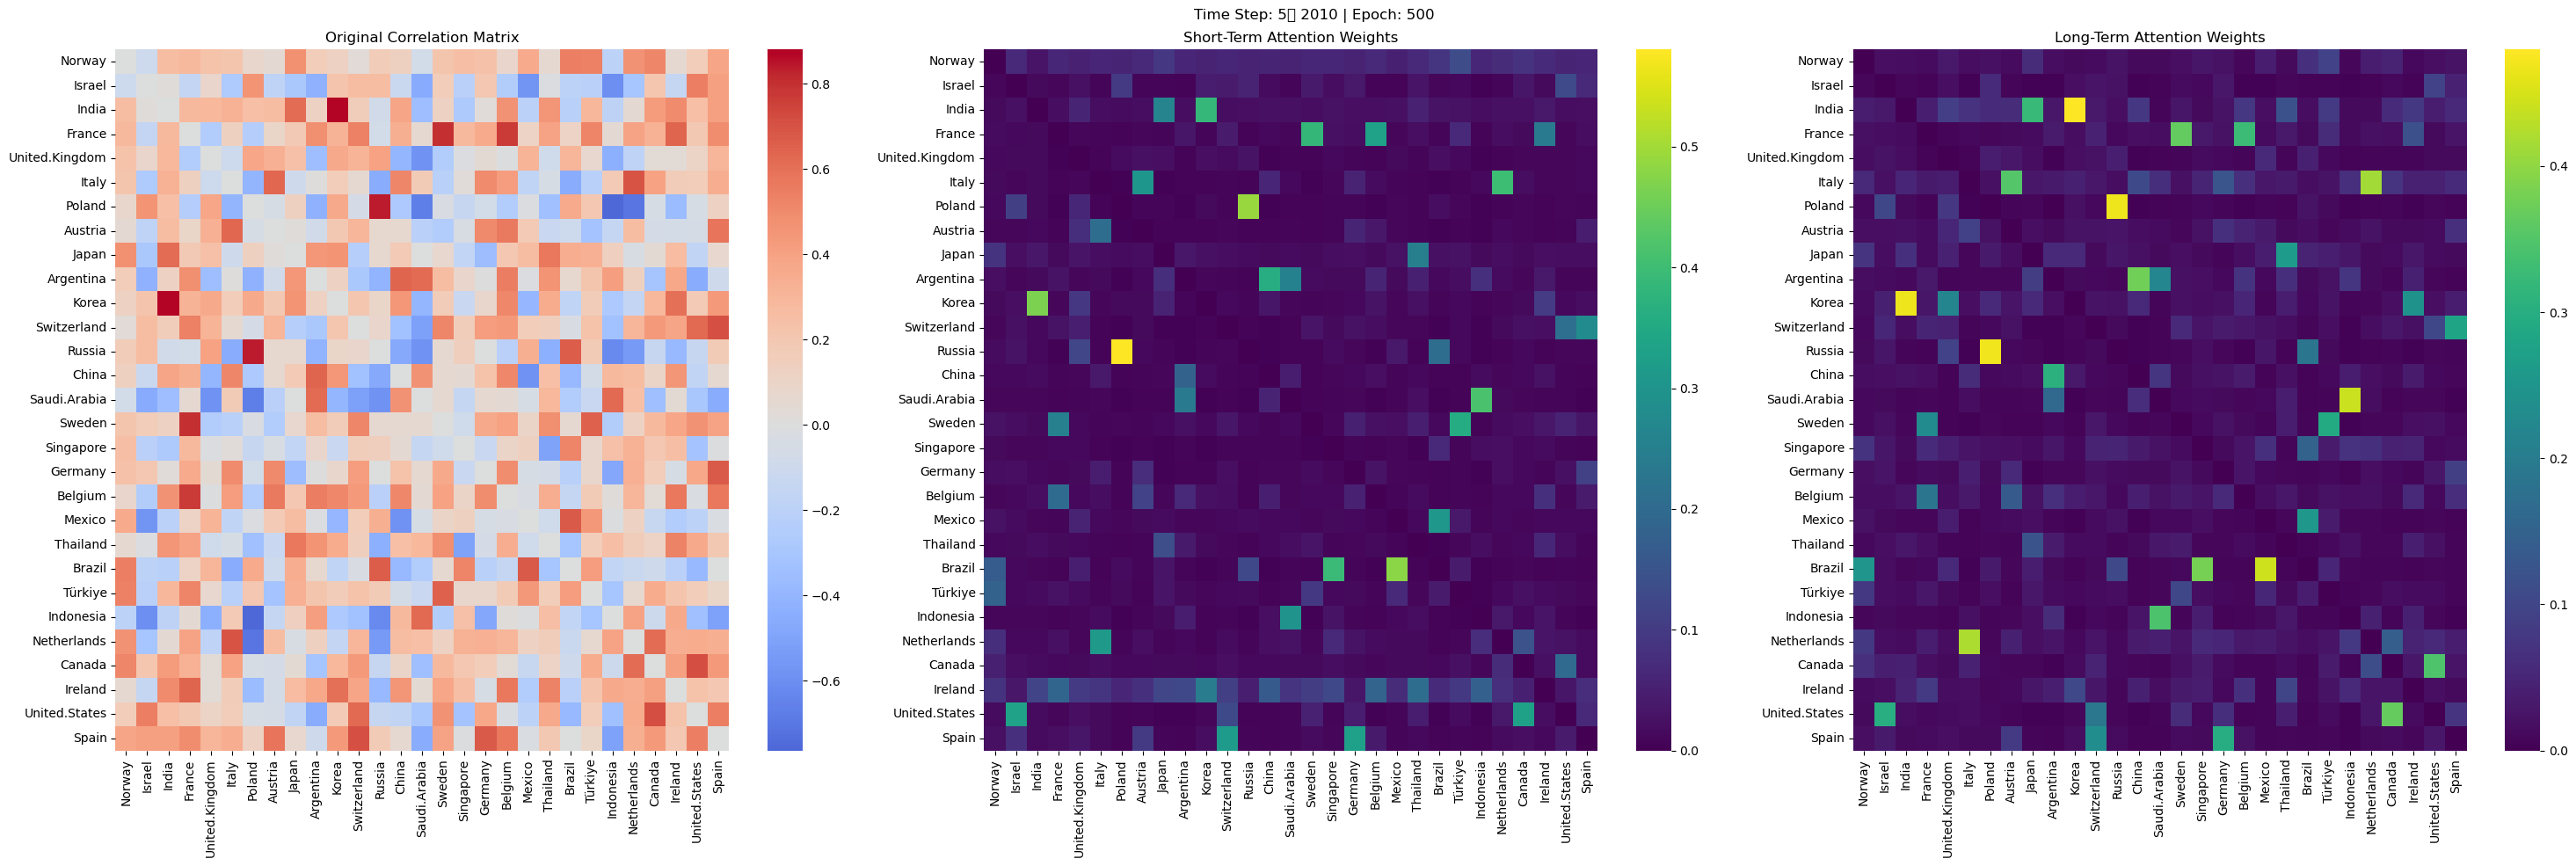

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ======= 1. 数据预处理 =======
DATA_PATH = "C:/Users/rog/Desktop/Study/统模/Global-Inflation-Spillovers/new_data/final_cpi_data_filtered.csv"
SAVE_DIR = "saved_adjacency_matrices"
os.makedirs(SAVE_DIR, exist_ok=True)

def load_and_preprocess(data_path):
    # 加载原始数据
    data = pd.read_csv(data_path, index_col=0)
    countries = data.columns.tolist()
    
    # 数据标准化
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    scaled_data = np.nan_to_num(scaled_data)
    
    return data, scaled_data, countries

def create_graph_sequence_with_saving(data, scaled_data, window_size=12):
    graphs = []
    adjacency_records = []
    n_times, n_countries = scaled_data.shape
    
    for t in range(window_size, n_times-12):
        # 节点特征
        node_features = scaled_data[t-window_size:t, :].T
        
        # 构建邻接矩阵
        edge_index = []
        edge_attr = []
        adj_matrix = np.zeros((n_countries, n_countries))
        
        for i in range(n_countries):
            for j in range(n_countries):
                if i != j:
                    x = scaled_data[t-window_size:t, i]
                    y = scaled_data[t-window_size:t, j]
                    valid_mask = ~np.isnan(x) & ~np.isnan(y)
                    if np.sum(valid_mask) >= 6:
                        corr = np.corrcoef(x[valid_mask], y[valid_mask])[0, 1]
                        edge_index.append([i, j])
                        edge_attr.append(corr)
                        adj_matrix[i, j] = corr
        
        # 保存邻接矩阵
        timestamp = data.index[t]
        np.save(os.path.join(SAVE_DIR, f"adj_{timestamp}.npy"), adj_matrix)
        adjacency_records.append({
            'timestamp': timestamp,
            'countries': data.columns.tolist(),
            'edge_index': edge_index,
            'edge_attr': edge_attr,
            'adj_matrix': adj_matrix
        })
        
        # 构建图数据
        graph = Data(
            x=torch.tensor(node_features, dtype=torch.float),
            edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
            edge_attr=torch.tensor(edge_attr, dtype=torch.float).unsqueeze(1),
            y_short_term=torch.tensor(scaled_data[t+1], dtype=torch.float),
            y_long_term=torch.tensor(scaled_data[t+12], dtype=torch.float)
        )
        graphs.append(graph)
    
    # 保存元数据
    with open(os.path.join(SAVE_DIR, 'adj_metadata.pkl'), 'wb') as f:
        pickle.dump({
            'countries': data.columns.tolist(),
            'records': adjacency_records
        }, f)
    
    return graphs

# ======= 2. 双注意力模型 =======
class DualAttentionGAT(nn.Module):
    def __init__(self, in_channels, out_channels=1, heads=4):
        super().__init__()
        
        # 短期预测分支
        self.short_conv1 = GATConv(in_channels, 16, heads=heads, edge_dim=1)
        self.short_conv2 = GATConv(16*heads, 32, heads=2, edge_dim=1)
        self.short_predictor = nn.Sequential(
            nn.Linear(32*2, 64),
            nn.ReLU(),
            nn.Linear(64, out_channels)
        )
        
        # 长期预测分支
        self.long_conv1 = GATConv(in_channels, 16, heads=heads, edge_dim=1)
        self.long_conv2 = GATConv(16*heads, 32, heads=2, edge_dim=1)
        self.long_predictor = nn.Sequential(
            nn.Linear(32*2, 64),
            nn.ReLU(),
            nn.Linear(64, out_channels)
        )

    def forward(self, data, return_attention=True):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        # 短期路径
        s_x, (s_ei, s_att1) = self.short_conv1(x, edge_index, edge_attr, return_attention_weights=True)
        s_x = F.elu(s_x)
        s_x, (_, s_att2) = self.short_conv2(s_x, edge_index, edge_attr, return_attention_weights=True)
        short_term = self.short_predictor(s_x).squeeze()
        short_att = (s_att1.mean(dim=1) + s_att2.mean(dim=1)) / 2
        
        # 长期路径
        l_x, (l_ei, l_att1) = self.long_conv1(x, edge_index, edge_attr, return_attention_weights=True)
        l_x = F.elu(l_x)
        l_x, (_, l_att2) = self.long_conv2(l_x, edge_index, edge_attr, return_attention_weights=True)
        long_term = self.long_predictor(l_x).squeeze()
        long_att = (l_att1.mean(dim=1) + l_att2.mean(dim=1)) / 2
        
        if return_attention:
            return short_term, long_term, short_att, long_att
        return short_term, long_term

# ======= 3. 训练和保存注意力 =======
def train_model(graphs, epochs=500):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = DualAttentionGAT(in_channels=WINDOW_SIZE).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
    
    # 创建注意力保存目录
    attn_dir = "saved_attention_weights"
    os.makedirs(attn_dir, exist_ok=True)
    
    for epoch in range(epochs):
        model.train()
        epoch_short_att = []
        epoch_long_att = []
        total_loss = 0
        
        for idx, graph in enumerate(graphs):
            graph = graph.to(device)
            optimizer.zero_grad()
            
            short_pred, long_pred, s_att, l_att = model(graph)
            
            loss = F.mse_loss(short_pred, graph.y_short_term) + \
                   F.mse_loss(long_pred, graph.y_long_term)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            # 保存注意力权重
            epoch_short_att.append(s_att.cpu().detach().numpy())
            epoch_long_att.append(l_att.cpu().detach().numpy())
            total_loss += loss.item()
        
        # 保存每个epoch的注意力
        np.savez_compressed(
            os.path.join(attn_dir, f"epoch_{epoch+1}.npz"),
            short_attention=np.array(epoch_short_att),
            long_attention=np.array(epoch_long_att)
        )
        
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(graphs):.4f}")

    return model

# ======= 4. 可视化工具 =======
def visualize_comparison(time_idx, epoch, countries):
    # 加载邻接矩阵
    with open(os.path.join(SAVE_DIR, 'adj_metadata.pkl'), 'rb') as f:
        meta = pickle.load(f)
    adj_matrix = meta['records'][time_idx]['adj_matrix']
    
    # 加载注意力权重
    attn_data = np.load(os.path.join("saved_attention_weights", f"epoch_{epoch}.npz"))
    short_att = attn_data['short_attention'][time_idx]
    long_att = attn_data['long_attention'][time_idx]
    
    # 转换为矩阵格式
    edge_index = meta['records'][time_idx]['edge_index']
    n = len(countries)
    
    def create_att_matrix(raw_att, edge_index):
        matrix = np.zeros((n, n))
        for (i, j), w in zip(edge_index, raw_att):
            matrix[i, j] = w
        return matrix
    
    short_matrix = create_att_matrix(short_att, edge_index)
    long_matrix = create_att_matrix(long_att, edge_index)
    
    # 绘制对比图
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    
    # 原始邻接矩阵
    sns.heatmap(adj_matrix, ax=axes[0], cmap="coolwarm", center=0,
                xticklabels=countries, yticklabels=countries)
    axes[0].set_title("Original Correlation Matrix")
    
    # 短期注意力
    sns.heatmap(short_matrix, ax=axes[1], cmap="viridis",
                xticklabels=countries, yticklabels=countries)
    axes[1].set_title("Short-Term Attention Weights")
    
    # 长期注意力
    sns.heatmap(long_matrix, ax=axes[2], cmap="viridis",
                xticklabels=countries, yticklabels=countries)
    axes[2].set_title("Long-Term Attention Weights")
    
    plt.suptitle(f"Time Step: {meta['records'][time_idx]['timestamp']} | Epoch: {epoch}")
    plt.tight_layout()
    plt.show()

# ======= 5. 主执行流程 =======
if __name__ == "__main__":
    # 参数设置
    WINDOW_SIZE = 12
    EPOCHS = 500
    
    # 数据准备
    raw_data, scaled_data, countries = load_and_preprocess(DATA_PATH)
    graphs = create_graph_sequence_with_saving(raw_data, scaled_data, WINDOW_SIZE)
    
    # 模型训练
    trained_model = train_model(graphs, epochs=EPOCHS)
    
    # 示例可视化
    visualize_comparison(time_idx=50, epoch=EPOCHS, countries=countries)
    visualize_comparison(time_idx=100, epoch=EPOCHS, countries=countries)